In [1]:
import skimage
from matplotlib.pyplot import imshow
from skimage.exposure import histogram
from matplotlib import pyplot as plt
import os

In [245]:
def plot_img_histogram(filename):

    img = skimage.io.imread(filename)
    # Teil von Bild
    img = img[:,:,:]

    height,width,channels = img.shape
    description =  'height: {h}, width: {w}, channels: {c}'.format(h=height,w=width,c=channels)
    
    # Bild darstellen

    fig,ax = plt.subplots(figsize=(10,10))
    ax.imshow(img)
    ax.set_title(filename+' - '+ description)

    # Bild und Kanäle darstellen

    fig, ax = plt.subplots(ncols=3, figsize=(10,10))

    ax[0].imshow(img[:,:,0])
    ax[0].set_title('red')

    ax[1].imshow(img[:,:,1])
    ax[1].set_title('green')

    ax[2].imshow(img[:,:,2])
    ax[2].set_title('blue')

    # Histogramm

    color = ('r','g','b')

    fig, ax = plt.subplots(figsize=(10,5))

    for i,col in enumerate(color):
        channel = img[:,:,i]
        channel_hist = skimage.exposure.histogram(channel)
        hist_phase, bins_phase = channel_hist
        ax.fill_between(bins_phase, hist_phase, color=col, alpha=0.3)
        ax.plot(hist_phase, color=col, alpha=0.3)

    ax.set_yscale('log')
    ax.set_xlabel('pixel value')
    ax.set_ylabel('pixel count')

In [225]:
os.chdir('/home/simeon/Schreibtisch/Testbilder')
print (os.listdir())
file = os.path.abspath('wald.jpg')

['blumen.jpg', 'wald.jpg', 'rosen.jpg']


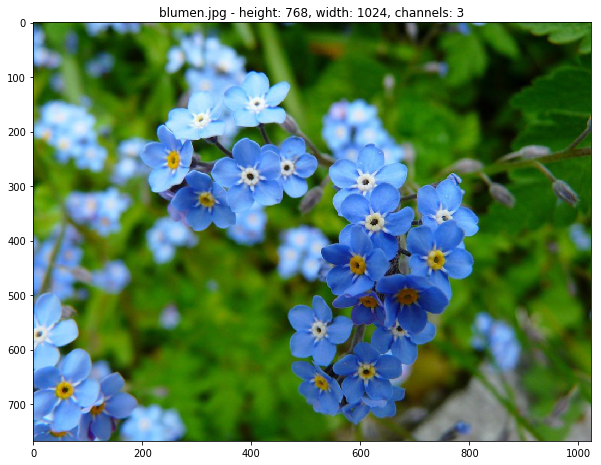

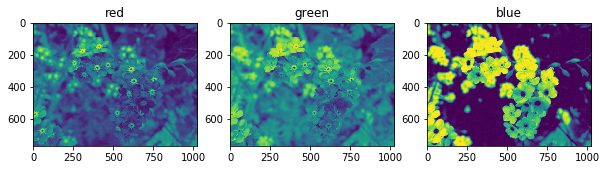

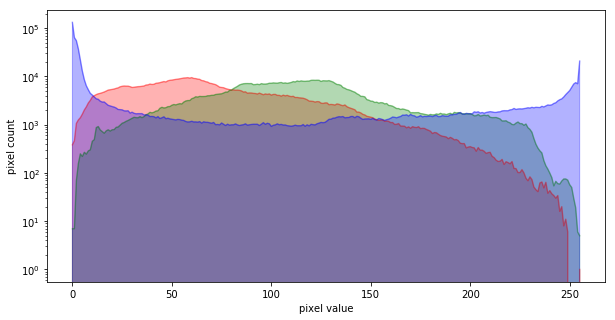

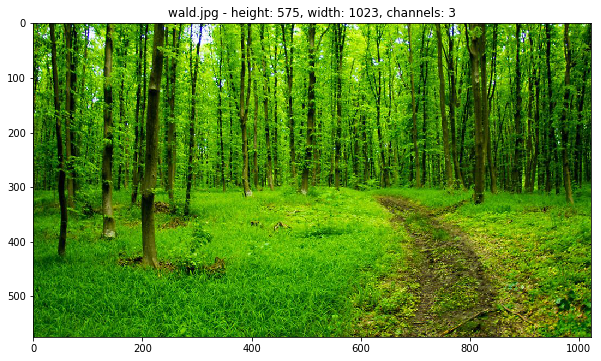

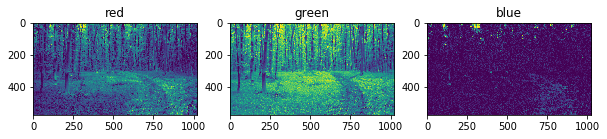

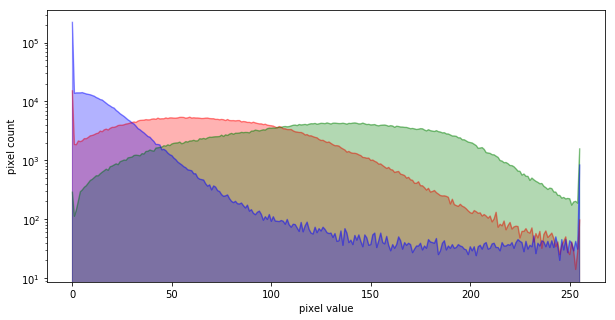

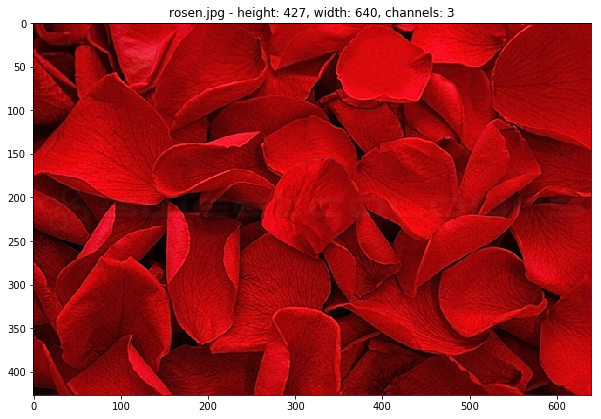

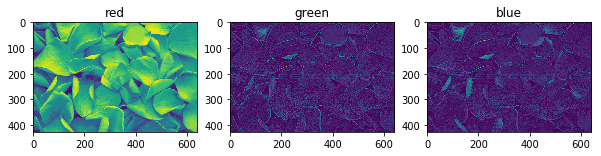

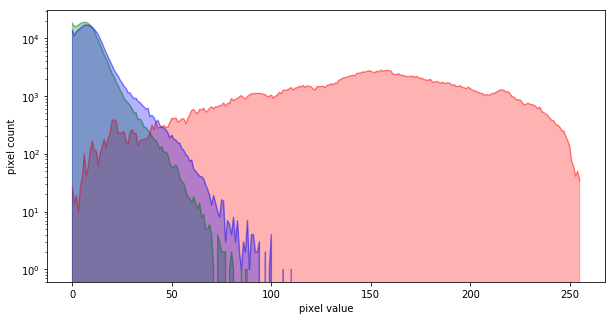

In [246]:
for file in os.listdir():
    plot_img_histogram(file)

/home/simeon/.anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:269: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/home/simeon/.anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/simeon/.anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/simeon/.anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


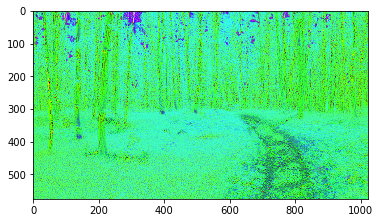

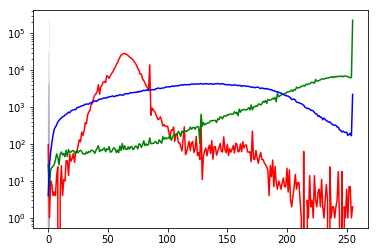

In [240]:
img = skimage.io.imread('wald.jpg')
img_converted = skimage.color.convert_colorspace(img, 'RGB', 'HSV')
imshow(img_converted)

# Histogramm

color = ('r','g','b')

fig, ax = plt.subplots()

for i,col in enumerate(color):
    channel = img_converted[:,:,i]
    channel_hist = skimage.exposure.histogram(channel)
    hist_phase, bins_phase = channel_hist
    ax.plot(hist_phase, color=col)
    ax.fill_between(bins_phase, hist_phase, color=col, alpha=0.1)

ax.set_yscale('log')
fig.show()